### Importing some useful modules

In [1]:
%%time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

Wall time: 7.05 s


#### Reading CSV File

In [2]:
auto = pd.read_csv("AutoData.csv")
print("Dataset with rows {} and columns {}".format(auto.shape[0],auto.shape[1]))
auto.head()

Dataset with rows 205 and columns 25


,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
auto.info() # so in this datasets we have 8 float data types, 7 interger data types and 10 object type data.
# to check if there is any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [4]:
auto.isnull().sum(axis=0) # so it's comparebly very clean data with no null values. 
# Now we will move to EDA part of the datasets.

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### EDA(Exploratory Data Analysis)

In [5]:
auto.head() # so considering all the features we have to predict the price.

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
%%time
# here we are seperating object and numerical data types 
obj_col = []
num_col = []
for col in auto.columns:
    if auto[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

Wall time: 0 ns


In [7]:
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)


Object data type features  ['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Numerical data type features  ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


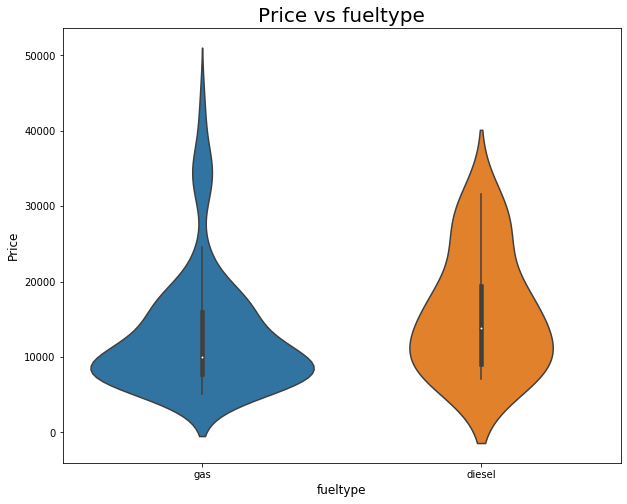

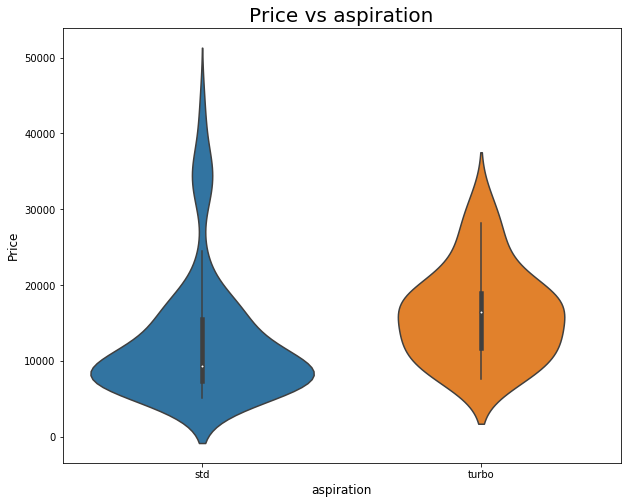

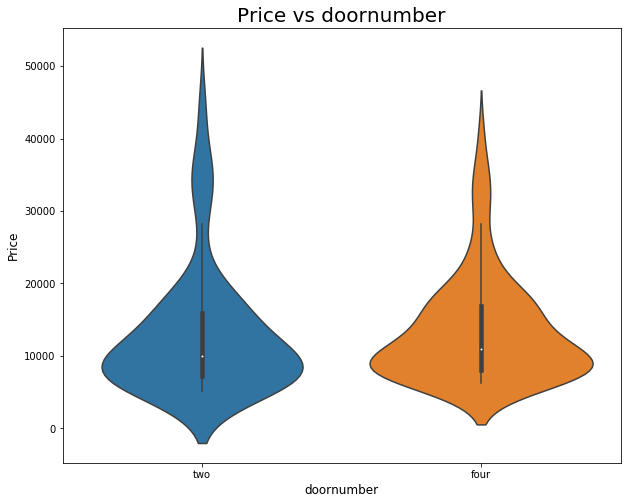

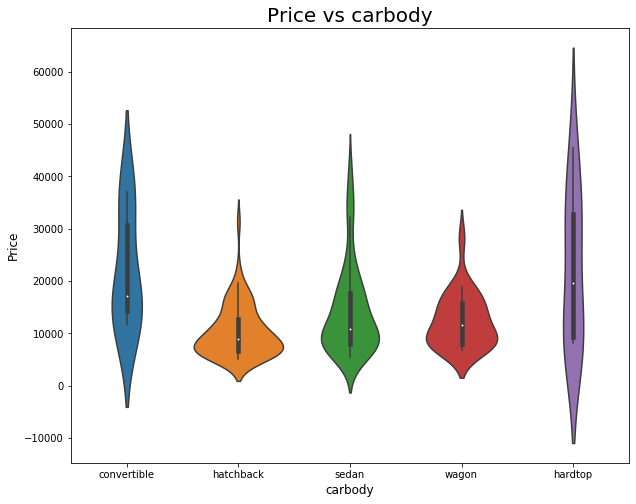

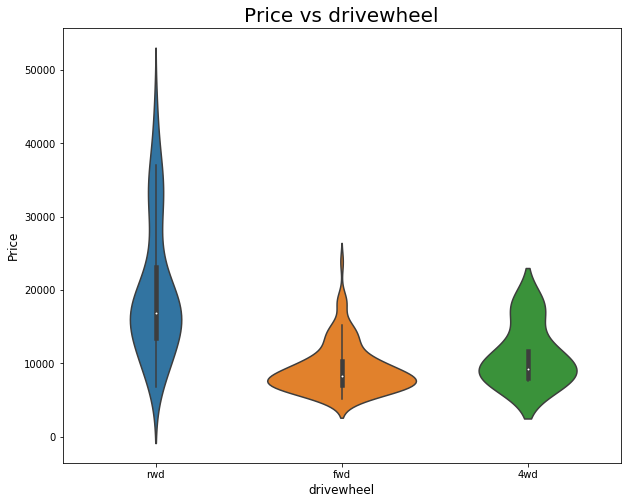

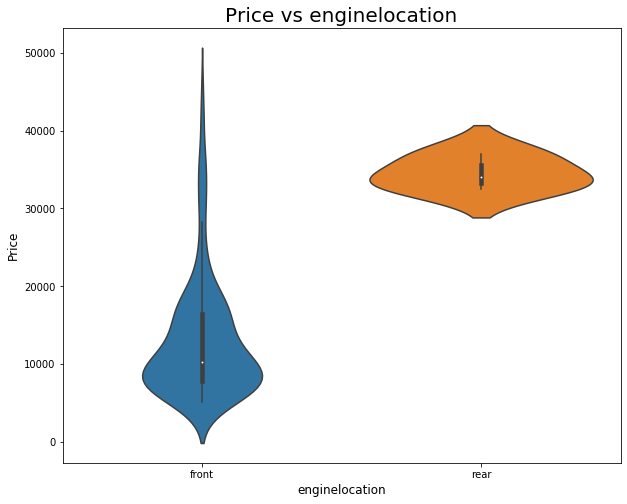

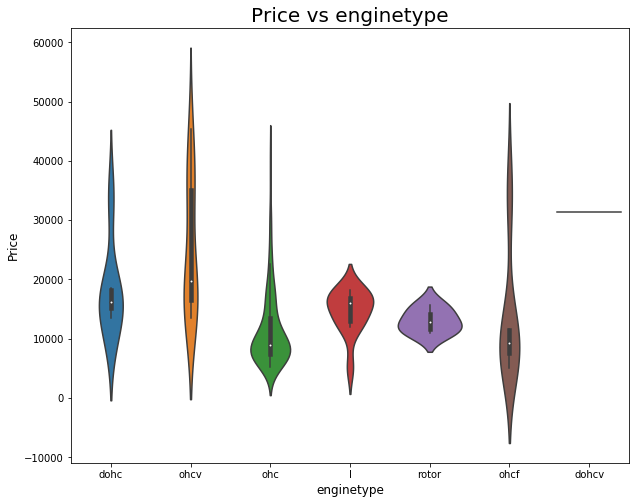

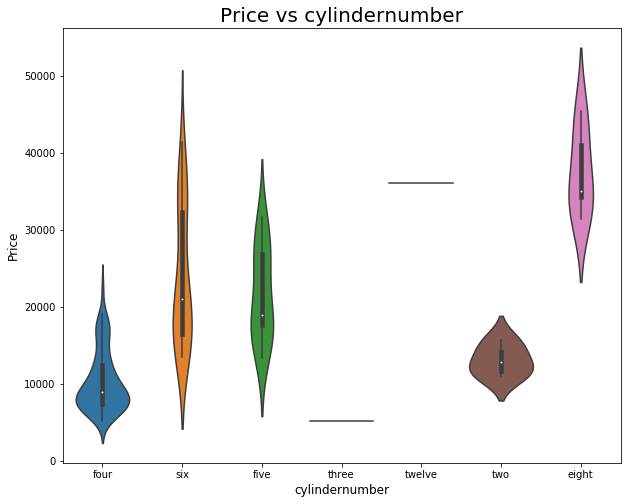

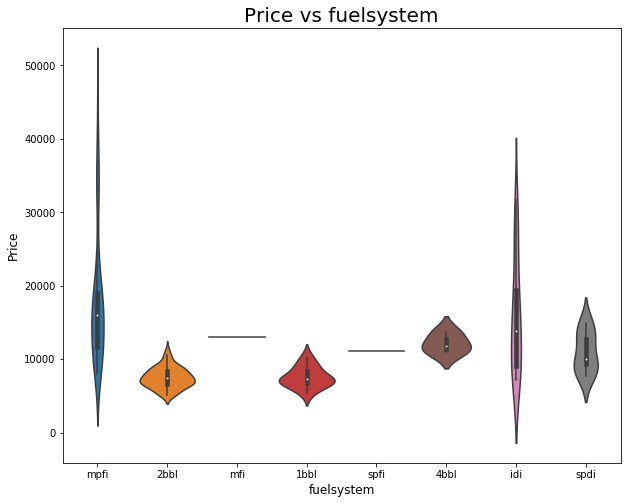

In [8]:
from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(10,8))
    sns.violinplot(auto[col],auto["price"])
    plt.title("Price vs "+col,fontsize=20)
    plt.xlabel(col,fontsize=12)
    plt.ylabel("Price",fontsize=12)
    plt.show()
#sns.despine()
# violin plots give best of both worlds 
# it gives boxplot and distribution of data like whether the data is skewed or not.
# if normally distributed then it's the best you can get.
# you can also use barplots in this case.

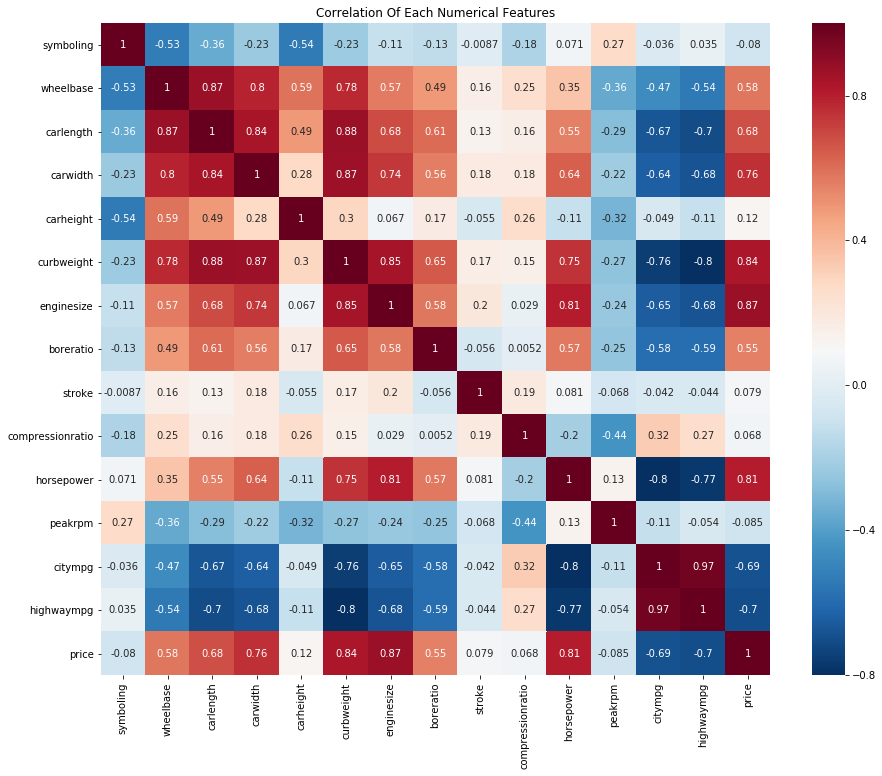

In [9]:
plt.figure(figsize=(15,12))
sns.heatmap(auto.corr(),annot=True,cmap='RdBu_r')
plt.title("Correlation Of Each Numerical Features")
plt.show()

1. There is certain group of features which is highly correlated i.e multicollinearity exist.
2. One cluster having high correlation between them is wheelbase,carlength,carwidth if you think mathematically the base is nothing but lenth*width.
3. Second Cluster having high correlation between them is enginesize,horsepower,curbweightand citympg(miles per gallon) if you think as enginesize increases horsepower also increases.And if engine is large enough then it's automatically goinf to increase the total mass of body.


<Figure size 720x576 with 0 Axes>

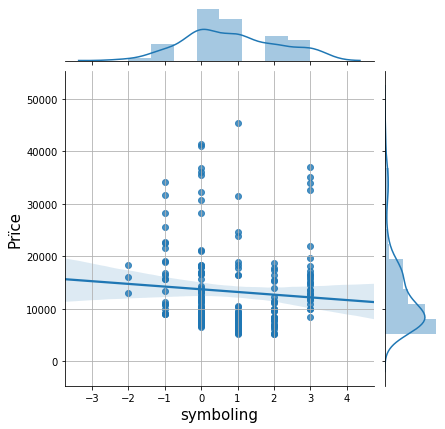

<Figure size 720x576 with 0 Axes>

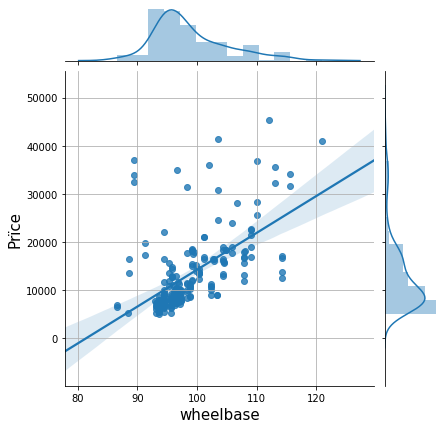

<Figure size 720x576 with 0 Axes>

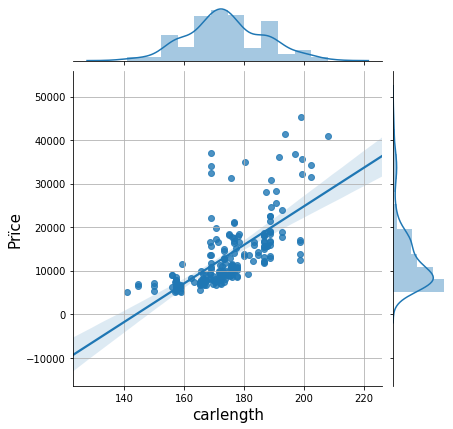

<Figure size 720x576 with 0 Axes>

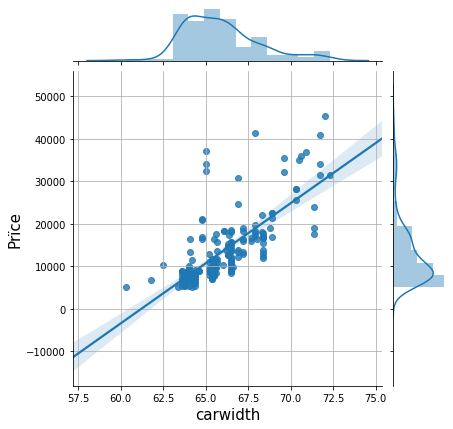

<Figure size 720x576 with 0 Axes>

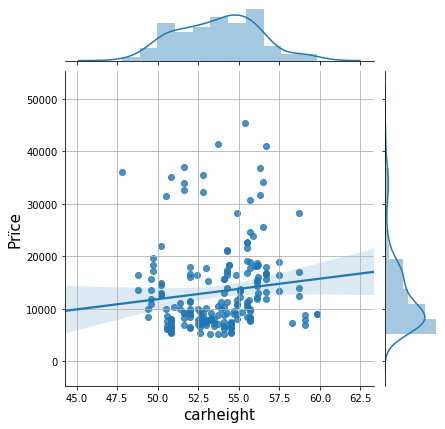

<Figure size 720x576 with 0 Axes>

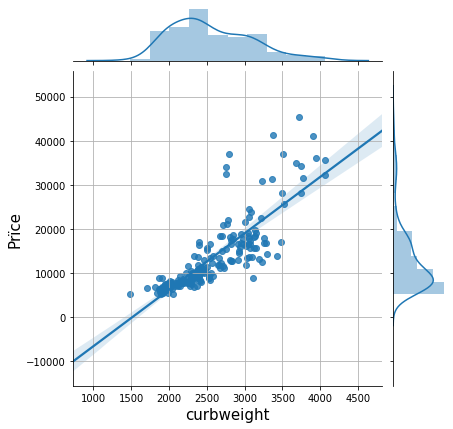

<Figure size 720x576 with 0 Axes>

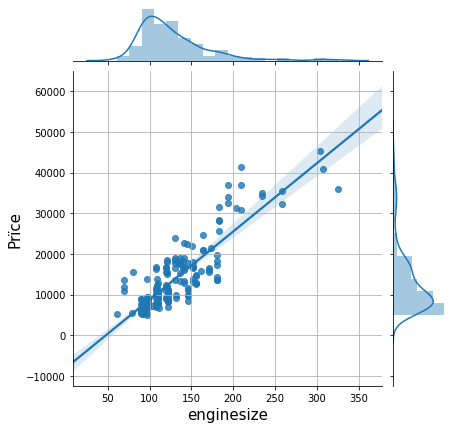

<Figure size 720x576 with 0 Axes>

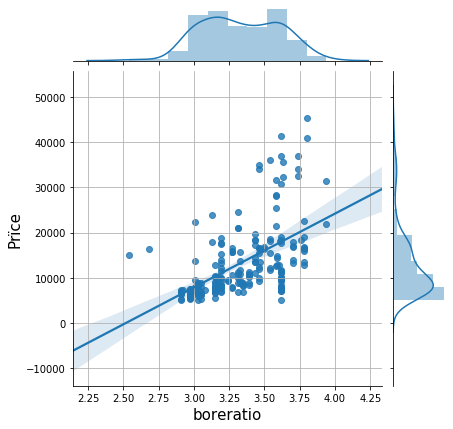

<Figure size 720x576 with 0 Axes>

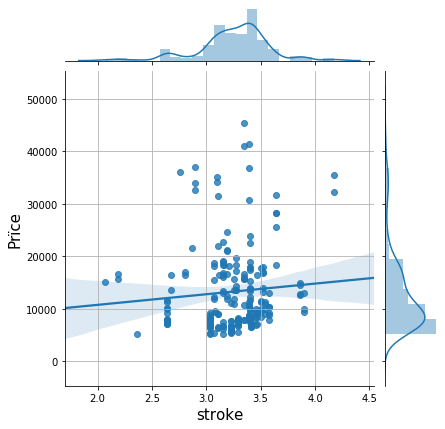

<Figure size 720x576 with 0 Axes>

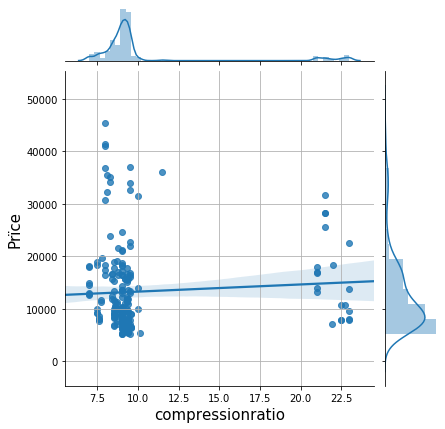

<Figure size 720x576 with 0 Axes>

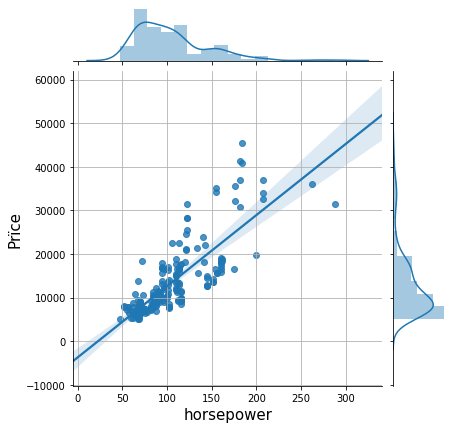

<Figure size 720x576 with 0 Axes>

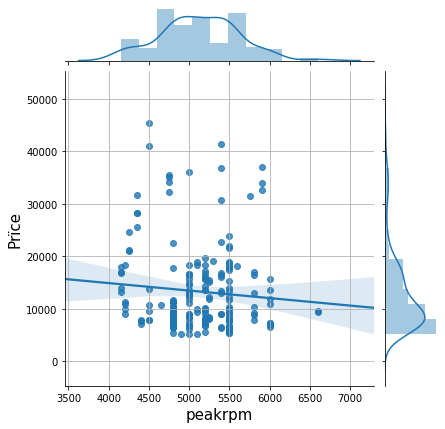

<Figure size 720x576 with 0 Axes>

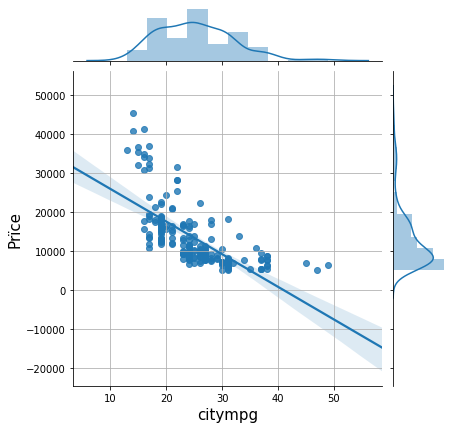

<Figure size 720x576 with 0 Axes>

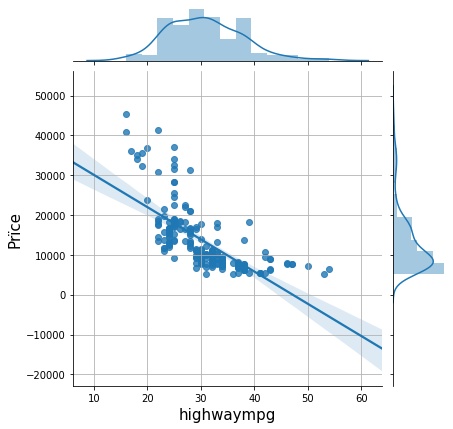

In [10]:
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = auto[col],y = auto["price"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Prïce",fontsize = 15)
    plt.grid()
    plt.show()

####  From above we can see only using one features i.e enginesize we can get r2_score of 0.80. This features we will be using in coming models.

In [11]:
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy import stats


temp=dict()
for col in (num_col[1:] + obj_col[:-1]):
    temp[col] = [pearsonr(auto["price"],auto[col])[0],spearmanr(auto["price"],auto[col])[0]]

NameError: name 'spearmanr' is not defined

In [12]:
temp = pd.DataFrame(temp)
temp.index=["Pearson Correlation","Spearman Correlation"]
temp

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

1. https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php to get some insights of how spearman rank correlation works and is different from pearson correlation.
2. One major disadvantage of pearson correlation is that it's very sensitive to outlier's points which rank correlation overcome it.

### Split the dataset using 80:20 ratio

In [13]:
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts = train_test_split(auto.drop(["price"],axis=1),auto["price"],test_size = 0.2,random_state=42)
print("Train Data shape ",X_tr.shape)
#X_tr.head()
print("Test Data shape ",X_ts.shape)
#X_ts.head()

Train Data shape  (164, 24)
Test Data shape  (41, 24)


### One Hot Encoding of Categorical Features

In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False,handle_unknown="ignore")
X_tr_obj = ohe.fit_transform(X_tr[obj_col])
X_ts_obj = ohe.transform(X_ts[obj_col])
print(X_tr_obj.shape)
print(X_ts_obj.shape)

(164, 161)
(41, 161)


In [15]:
features = ohe.get_feature_names().tolist()

In [16]:
X_tr_obj = pd.DataFrame(X_tr_obj,columns= features)
X_ts_obj = pd.DataFrame(X_ts_obj,columns= features)

In [17]:
auto["make"].value_counts()

toyota corolla                     6
peugeot 504                        6
toyota corona                      6
subaru dl                          4
mitsubishi outlander               3
mazda 626                          3
mitsubishi g4                      3
toyota mark ii                     3
honda civic                        3
mitsubishi mirage g4               3
volvo 144ea                        2
bmw x3                             2
mazda glc                          2
subaru                             2
bmw 320i                           2
nissan latio                       2
mazda rx-7 gs                      2
toyota corolla 1200                2
saab 99le                          2
plymouth fury iii                  2
nissan rogue                       2
toyota corolla liftback            2
volvo 264gl                        2
peugeot 604sl                      2
volvo 145e (sw)                    2
saab 99gle                         2
isuzu D-Max                        2
h

In [18]:
X_tr_obj["x0_Nissan versa"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
134    0.0
135    0.0
136    0.0
137    0.0
138    0.0
139    0.0
140    0.0
141    0.0
142    0.0
143    0.0
144    0.0
145    0.0
146    0.0
147    0.0
148    0.0
149    0.0
150    0.0
151    0.0
152    0.0
153    0.0
154    0.0
155    0.0
156    0.0
157    0.0
158    0.0
159    0.0
160    0.0
161    0.0
162    0.0
163    0.0
Name: x0_Nissan versa, Length: 164, dtype: float64

### Min-Max Scaling of Numerical Features

In [19]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_tr = min_max.fit_transform(X_tr[num_col[:-1]])
X_ts = min_max.transform(X_ts[num_col[:-1]])
print(X_tr.shape)
print(X_ts.shape)

(164, 14)
(41, 14)


In [20]:
X_tr = pd.DataFrame(X_tr,columns=num_col[:-1])
X_ts = pd.DataFrame(X_ts,columns=num_col[:-1])

In [21]:
X_tr = pd.concat([X_tr_obj,X_tr[num_col[:-1]]],axis=1)
X_ts = pd.concat([X_ts_obj,X_ts[num_col[:-1]]],axis=1)
print(X_tr.shape)
print(X_ts.shape)

(164, 175)
(41, 175)


In [22]:
X_tr.head()

,x0_Nissan versa,x0_alfa-romero Quadrifoglio,x0_alfa-romero giulia,x0_alfa-romero stelvio,x0_audi 100 ls,x0_audi 100ls,x0_audi 4000,x0_audi 5000,x0_audi fox,x0_bmw 320i,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.550000,0.392078,0.250000,0.635714,0.747619,0.9375,0.084746,0.020408,0.5625,0.676471
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.741667,0.558968,0.195312,0.657143,0.057143,0.0875,0.182203,0.346939,0.1875,0.235294
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.941667,0.205162,0.085938,0.364286,0.457143,0.1250,0.042373,0.265306,0.5625,0.617647
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.558333,0.067646,0.105469,0.435714,0.580952,0.1500,0.072034,0.428571,0.5625,0.617647
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.458333,0.209168,0.156250,0.435714,0.719048,0.1250,0.144068,0.673469,0.4375,0.500000


### Linear Regression

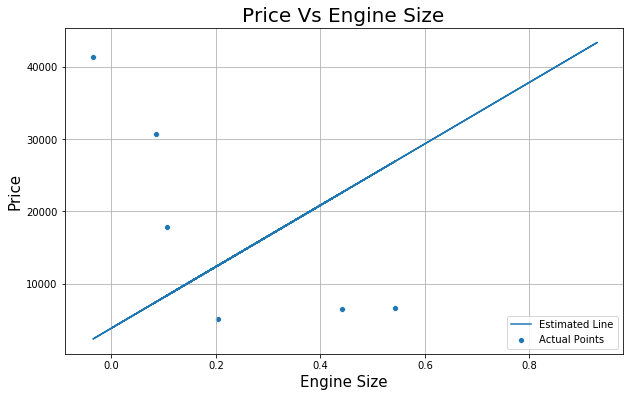

R2 Score using engine size features is --> 0.8040958796678975


In [23]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score

# calculation part
model = LinearRegression()
model.fit(np.array(X_tr["enginesize"]).reshape(-1,1),np.array(y_tr).reshape(-1,1))
y_pred = model.predict(np.array(X_ts["enginesize"]).reshape(-1,1))


# plotting part
plt.figure(figsize=(10,6))
sns.scatterplot(x = X_ts["enginesize"],y = y_ts,label = "Actual Points",palette="set1")
plt.plot(X_ts["enginesize"],y_pred,label = "Estimated Line")
plt.title("Price Vs Engine Size",fontsize=20)
plt.xlabel("Engine Size",fontsize = 15)
plt.ylabel("Price",fontsize = 15)
plt.legend()
plt.grid()
plt.show()
print("R2 Score using engine size features is -->",r2_score(y_ts,y_pred))

1. So from above eda and visualizations we are aware that enginesize is the most important numerical features which contribute more in predicting the target values.
2. So we have used only engine size features to predict the r2 score which is 0.804

## Multiple Regression Models

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import RFE




## Result Based On RFE(Reverse Features Selection)

#### Categorical Features

In [25]:
#selecting top 10 features 
lr = LinearRegression(n_jobs=-1)
rfe = RFE(estimator=lr,n_features_to_select=10)
rfe.fit(X_tr,y_tr)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [26]:
selected_feat = X_tr.columns[rfe.ranking_==1]

In [27]:
selected_feat

Index(['x0_audi 4000', 'x0_mazda glc 4', 'x0_toyota corona liftback',
       'x0_toyota tercel', 'x4_hardtop', 'x5_rwd', 'x8_eight', 'x8_four',
       'x8_twelve', 'x9_4bbl'],
      dtype='object')

In [28]:
X_tr_cat = sm.add_constant(X_tr[selected_feat]) # adding constant 

In [41]:
pd.Series([variance_inflation_factor(X_tr_cat.values, i) 
               for i in range(X_tr_cat.shape[1])], 
              index=X_tr_cat.columns)
# Variance inflation factor1/(1-1)

const                        10.058566
x0_audi 4000                  1.054861
x0_mazda glc 4                1.038307
x0_toyota corona liftback     1.395591
x0_toyota tercel              1.395591
x4_hardtop                    1.877301
x5_rwd                        1.317903
x8_eight                      1.181014
x8_four                       1.565730
x8_twelve                     1.038307
x9_4bbl                       1.076069
dtype: float64

In [42]:
model = sm.OLS(np.array(y_tr),X_tr_cat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     51.97
Date:                Fri, 03 Jan 2020   Prob (F-statistic):           3.72e-44
Time:                        12:35:51   Log-Likelihood:                -1579.4
No. Observations:                 164   AIC:                             3181.
Df Residuals:                     153   BIC:                             3215.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.668e+04    944.343     17.668      0.000    1.48e+04    1.86e+04
x0_audi 4000               7190.5364   3928.345      1.830      0.069    -570.263     1.5e+04
x0_mazda glc 4            -7552.9451   3897.398     -1.938      0.054   -1.53e+04     146.717
x0_toyota corona liftback -1.737e+04   4518.465     -3.843      0.000   -2.63e+04   -8439.665
x0_toyota tercel          -1.462e+04   4518.465     -3.235      0.001   -2.35e+04   -5689.665
x4_hardtop                 1.056e+04   2372.953      4.452      0.000    5875.648    1.53e+04
x5_rwd                     6513.4815    702.775      9.268      0.000    5125.086    7901.877
x8_eight                   1.067e+04   2097.700      5.087      0.000    6527.077    1.48e+04
x8_four                   -7946.2751    919.080     -8.646      0.000   -9762.000   -6130.550
x8_twelve                   1.28e+04   3897.398      3.285      0.001    5102.393    2.05e+04
x9_4bbl                   -1.045e+04   2814.189     -3.714      0.000    -1.6e+04   -4893.261
==============================================================================
Omnibus:                       35.310   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.404
Skew:                           0.990   Prob(JB):                     8.50e-16
Kurtosis:                       5.497   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X_tr_obj = X_tr_obj[["x6_rear","x7_dohc","x7_l","x7_ohc","x8_eight","x8_twelve","x8_four"]]

#### Numerical Features

In [ ]:
lr = LinearRegression(n_jobs=-1)
rfe = RFE(estimator=lr,n_features_to_select=5)
rfe.fit(X_tr[num_col[:-1]],y_tr)

In [ ]:
selected_feat = X_tr[num_col[:-1]].columns[rfe.ranking_==1]

In [30]:
selected_feat

Index(['x0_audi 4000', 'x0_mazda glc 4', 'x0_toyota corona liftback',
       'x0_toyota tercel', 'x4_hardtop', 'x5_rwd', 'x8_eight', 'x8_four',
       'x8_twelve', 'x9_4bbl'],
      dtype='object')

In [31]:
X_tr_num = sm.add_constant(X_tr[selected_feat])

In [32]:
pd.Series([variance_inflation_factor(X_tr_num.values, i) 
               for i in range(X_tr_num.shape[1])], 
              index=X_tr_num.columns)

const                        10.058566
x0_audi 4000                  1.054861
x0_mazda glc 4                1.038307
x0_toyota corona liftback     1.395591
x0_toyota tercel              1.395591
x4_hardtop                    1.877301
x5_rwd                        1.317903
x8_eight                      1.181014
x8_four                       1.565730
x8_twelve                     1.038307
x9_4bbl                       1.076069
dtype: float64

In [33]:
model = sm.OLS(np.array(y_tr),X_tr_num).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     51.97
Date:                Fri, 03 Jan 2020   Prob (F-statistic):           3.72e-44
Time:                        12:32:58   Log-Likelihood:                -1579.4
No. Observations:                 164   AIC:                             3181.
Df Residuals:                     153   BIC:                             3215.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.668e+04    944.343     17.668      0.000    1.48e+04    1.86e+04
x0_audi 4000               7190.5364   3928.345      1.830      0.069    -570.263     1.5e+04
x0_mazda glc 4            -7552.9451   3897.398     -1.938      0.054   -1.53e+04     146.717
x0_toyota corona liftback -1.737e+04   4518.465     -3.843      0.000   -2.63e+04   -8439.665
x0_toyota tercel          -1.462e+04   4518.465     -3.235      0.001   -2.35e+04   -5689.665
x4_hardtop                 1.056e+04   2372.953      4.452      0.000    5875.648    1.53e+04
x5_rwd                     6513.4815    702.775      9.268      0.000    5125.086    7901.877
x8_eight                   1.067e+04   2097.700      5.087      0.000    6527.077    1.48e+04
x8_four                   -7946.2751    919.080     -8.646      0.000   -9762.000   -6130.550
x8_twelve                   1.28e+04   3897.398      3.285      0.001    5102.393    2.05e+04
x9_4bbl                   -1.045e+04   2814.189     -3.714      0.000    -1.6e+04   -4893.261
==============================================================================
Omnibus:                       35.310   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.404
Skew:                           0.990   Prob(JB):                     8.50e-16
Kurtosis:                       5.497   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X_tr_main = pd.concat([X_tr_obj,X_tr_num],axis=1)
X_tr_main.head()

,x0_Nissan versa,x0_alfa-romero Quadrifoglio,x0_alfa-romero giulia,x0_alfa-romero stelvio,x0_audi 100 ls,x0_audi 100ls,x0_audi 4000,x0_audi 5000,x0_audi fox,x0_bmw 320i,...,x0_audi 4000,x0_mazda glc 4,x0_toyota corona liftback,x0_toyota tercel,x4_hardtop,x5_rwd,x8_eight,x8_four,x8_twelve,x9_4bbl
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
model = sm.OLS(np.array(y_tr),X_tr_main).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     9.404
Date:                Fri, 03 Jan 2020   Prob (F-statistic):           1.31e-08
Time:                        12:32:58   Log-Likelihood:                -1375.4
No. Observations:                 164   AIC:                             3029.
Df Residuals:                      25   BIC:                             3460.
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
x0_Nissan versa                    -2345.2255   3190.124     -0.735      0.469   -8915.409    4224.958
x0_alfa-romero Quadrifoglio        -2042.8836   2713.884     -0.753      0.459   -7632.231    3546.464
x0_alfa-romero giulia              -3405.0819   4064.423     -0.838      0.410   -1.18e+04    4965.754
x0_alfa-romero stelvio              -400.0819   4064.423     -0.098      0.922   -8770.918    7970.754
x0_audi 100 ls                      2112.5930   2993.083      0.706      0.487   -4051.778    8276.964
x0_audi 100ls                      -2749.6327   2346.883     -1.172      0.252   -7583.129    2083.864
x0_audi 4000                        1210.5523   1704.526      0.710      0.484   -2299.984    4721.089
x0_audi 5000                       -1702.2090   3029.622     -0.562      0.579   -7941.832    4537.414
x0_audi fox                        -3674.8670   2962.414     -1.240      0.226   -9776.073    2426.339
x0_bmw 320i                         3715.1740   2936.276      1.265      0.217   -2332.200    9762.548
x0_bmw x1                           5284.7103   5654.507      0.935      0.359   -6360.964    1.69e+04
x0_bmw x3                           1.197e+04   5094.174      2.349      0.027    1475.242    2.25e+04
x0_bmw z4                           7539.3910   5437.676      1.387      0.178   -3659.712    1.87e+04
x0_buick opel isuzu deluxe           185.0149   2801.591      0.066      0.948   -5584.969    5954.999
x0_buick regal sport coupe (turbo)  7670.2440   1976.513      3.881      0.001    3599.539    1.17e+04
x0_buick skyhawk                    9107.5039   3851.650      2.365      0.026    1174.882     1.7e+04
x0_buick skylark                    -543.8306   2339.954     -0.232      0.818   -5363.056    4275.395
x0_chevrolet monte carlo           -2674.0850   3063.548     -0.873      0.391   -8983.581    3635.411
x0_chevrolet vega 2300             -2609.5448   2891.905     -0.902      0.375   -8565.534    3346.444
x0_dodge challenger se             -2592.0850   3063.548     -0.846      0.406   -8901.581    3717.411
x0_dodge colt (sw)                 -1575.5448   2891.905     -0.545      0.591   -7531.534    4380.444
x0_dodge coronet custom            -3127.7968   3777.160     -0.828      0.415   -1.09e+04    4651.410
x0_dodge coronet custom (sw)        1700.0986   1591.402      1.068      0.296   -1577.455    4977.652
x0_dodge d200                      -4853.6562   3633.346     -1.336      0.194   -1.23e+04    2629.360
x0_dodge dart custom                -620.5676   3331.998     -0.186      0.854   -7482.945    6241.810
x0_dodge monaco (sw)               -4080.4043   3179.787     -1.283      0.211   -1.06e+04    2468.490
x0_dodge rampage                   -3397.0850   3063.548     -1.109      0.278   -9706.581    29

In [38]:
top_features = X_tr_main[["x6_rear","x7_ohc","x8_four"]]

In [40]:
lr = LinearRegression(n_jobs=-1)
lr.fit(top_features,y_tr)
X_ts_main = X_ts[["x6_rear","x7_ohc","x8_four"]]
y_pred = lr.predict(X_ts_main)
y_pred_tr = lr.predict(top_features)
print("r2 score on test data is --> ",r2_score(y_ts,y_pred))
print("r2 score on train data is --> ",r2_score(y_tr,y_pred_tr))

ValueError: shapes (41,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

## Conclusion

1. We have selected some categorical features and numerical features and concat them to get r2 scores of 0.85 on test data.
2. But as we have seen in above code snippets that we only used enginesize features and got 0.80 r2 scores.
3. We can also try to calculate adjusted r2 score.
4. So in above codes we have selected features based on p-values, as p-values approaches zero we can say that 
5. Prob(features contribute more | null hypothesis is true)<0.05 where 0.05 is statistical significant value.
6. where our h0(null hypothesis) is that there is no correlation between target variable and selected feature.